Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [1]:
from random import random, seed
from itertools import product, accumulate
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from icecream import ic

c:\michele\uni\polito\quinto_anno\primo_semestre\computational_intelligence\labs\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [2]:
UNIVERSE_SIZE = 100
NUM_SETS = 50
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [3]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

In [4]:
print(SETS)
print(COSTS)

[[False False  True ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True False False ... False False  True]
 [ True False False ... False False False]
 [False  True False ...  True False False]]
[43.70165289 29.96849606 42.15347479 26.98565695 39.07273703 34.49324154
 28.47352424 31.47028092 53.09112113 45.254834   48.37564947 45.254834
 32.97861145 37.5405076  36.01394382 34.49324154 29.96849606 36.01394382
 39.07273703 37.5405076  32.97861145 53.09112113 45.254834   46.81287714
 32.97861145 51.51488692 29.96849606 42.15347479 42.15347479 42.15347479
 43.70165289 36.01394382 39.07273703 43.70165289 37.5405076  62.63474319
 42.15347479 46.81287714 48.37564947 48.37564947 43.70165289 40.61044961
 46.81287714 39.07273703 54.67162169 42.15347479 25.50521337 48.37564947
 45.254834   46.81287714]


## Helper Functions

In [5]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    temp = np.logical_or.reduce(SETS[solution])     # at least each element covered by a set
    return np.all(temp)                             # all elements are covered


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [6]:
# A dumb solution of "all" sets
def all_sets():
    solution = np.full(NUM_SETS, True)
    valid(solution), cost(solution)
    return solution

In [7]:
# A random solution with random 50% of the sets
rng_sol = rng.random(NUM_SETS) < .5
valid(rng_sol), cost(rng_sol)

(np.True_, np.float64(855.1874570849172))

In [22]:
def evaluate(solution):
    return cost(solution) if valid(solution) else cost(all_sets())

### RM hill climbing with random multiple tweak

In [9]:
def tweak(solution):
    pos = None
    while pos is None or rng.random() < 0.4:
        pos = int(NUM_SETS * rng.random())
        solution[pos] = not solution[pos]
    return solution

100%|██████████| 1000/1000 [00:00<00:00, 11718.88it/s]


Minimum cost: 347.5728676678867, valid: True, found at iteration 829/1000


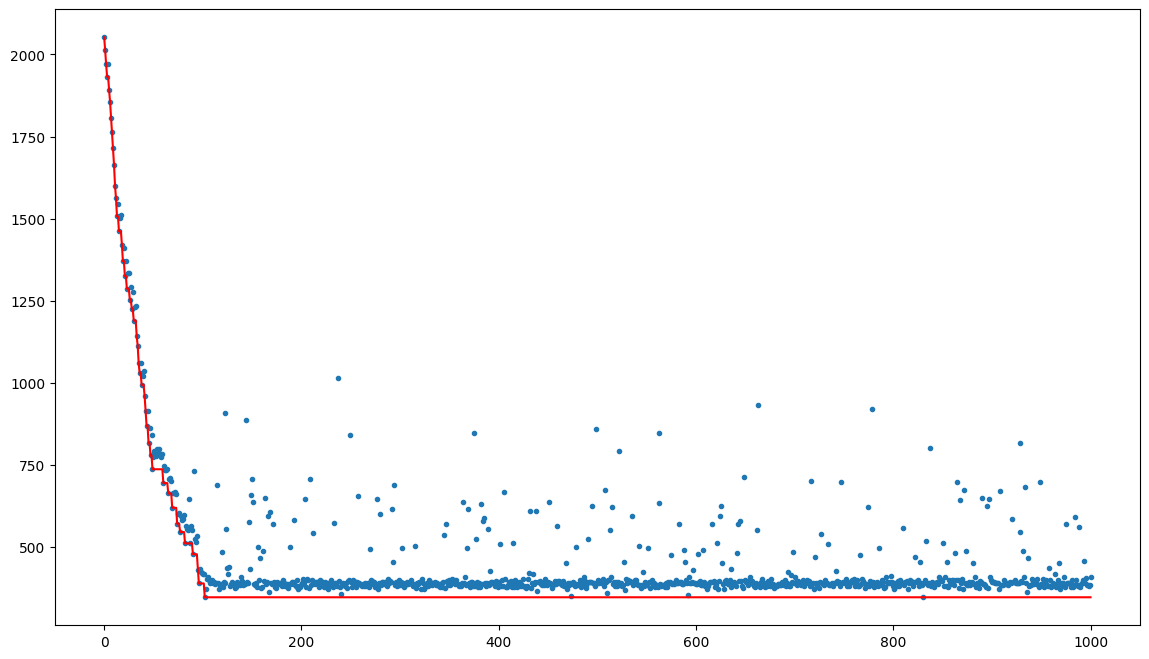

In [23]:
NUM_STEPS = 1000
sol_iter = 0
history = []
solution = all_sets()

history.append(evaluate(solution))
for i in tqdm(range(NUM_STEPS)):
    current = tweak(solution.copy())
    
    history.append(evaluate(current))
    if evaluate(current) < evaluate(solution):
        sol_iter = i
        solution = current

print(f"Minimum cost: {evaluate(solution)}, valid: {valid(solution)}, found at iteration {sol_iter}/{NUM_STEPS}")

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

### RM hill climbing with validation in tweak

In [11]:
def tweak(solution):
    ok = False
    while not ok:
        pos = int(NUM_SETS * rng.random())
        solution[pos] = not solution[pos]
        ok = valid(solution)
    return solution

In [16]:
def evaluate(solution):
    return cost(solution)

100%|██████████| 1000/1000 [00:00<00:00, 21066.32it/s]

Minimum cost: 351.9108254864957, valid: True, found at iteration 801/1000


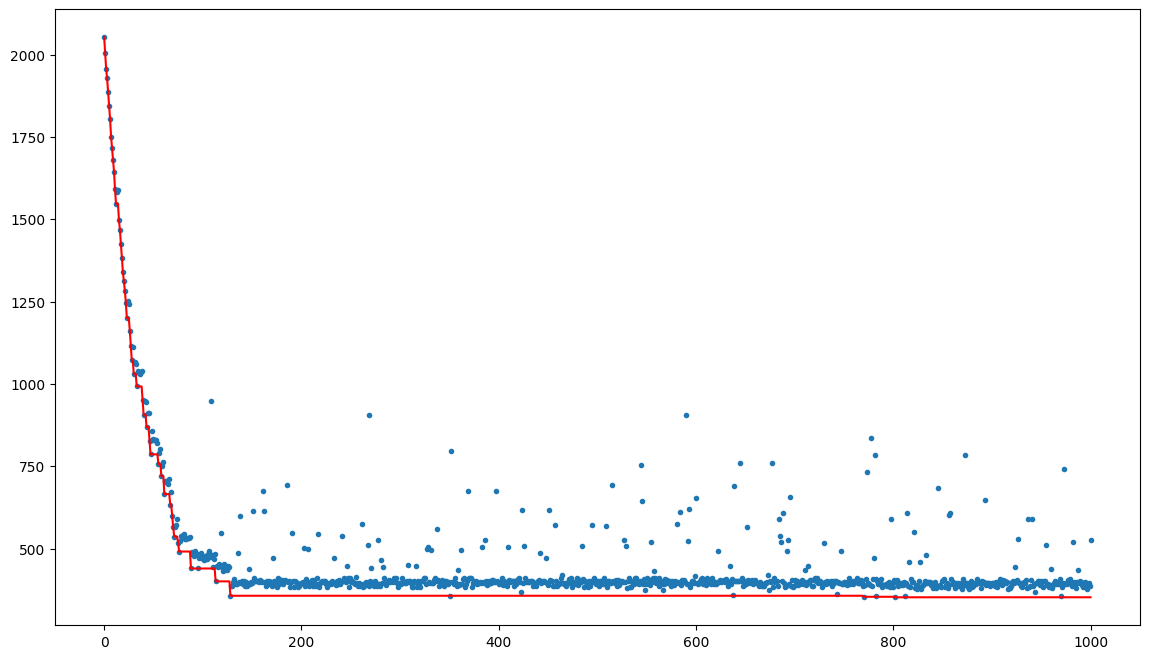

In [17]:
NUM_STEPS = 1000
sol_iter = 0
history = []
solution = all_sets()

history.append(evaluate(solution))
for i in tqdm(range(NUM_STEPS)):
    current = tweak(solution.copy())
    
    history.append(evaluate(current))
    if evaluate(current) < evaluate(solution):
        sol_iter = i
        solution = current

print(f"Minimum cost: {evaluate(solution)}, valid: {valid(solution)}, found at iteration {sol_iter}/{NUM_STEPS}")

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")